In [35]:
import numpy as np
import random
import copy
import math
import matplotlib.pyplot as plt

In [36]:
distances_from_city=[[0, 5, 2, 7],
                     [3, 0, 4, 6],
                     [1, 2, 0, 4],
                     [8, 3, 6, 0]]

In [37]:
def initialize_solution(num_cities):
    # Generisanje početnog rešenja, na primer, slučajnom permutacijom gradova
    solution = random.sample(range(num_cities), num_cities)
    return solution

In [38]:
def asymmetric_swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

In [39]:
def asymmetric_distance(city1, city2, distances_from_city):
    return distances_from_city[city1][city2]

In [40]:
def calculate_solution_asymmetric(solution, distances_from_city):
    total_distance = 0
    num_cities = len(solution)
 
    for i in range(num_cities - 1):
        total_distance += asymmetric_distance(solution[i], solution[i + 1], distances_from_city)
    total_distance += asymmetric_distance(solution[-1], solution[0], distances_from_city)
    return total_distance

In [41]:
def get_asymmetric_neighbors(current_solution):
    neighborhood = []
    n = len(current_solution)

    for _ in range(n):
        i, j = random.sample(range(n), 2)
        neighbor = current_solution.copy()
        asymmetric_swap(neighbor, i, j)
        neighborhood.append(neighbor)

    for _ in range(n):
        i, j = sorted(random.sample(range(n), 2))
        neighbor = current_solution.copy()
        neighbor[i:j + 1] = reversed(neighbor[i:j + 1])
        neighborhood.append(neighbor)

    return neighborhood

In [42]:
def find_best_asymmetric_neighbor(non_tabu_neighbors, distances_from_city):
    best_neighbor = None
    best_distance = float('inf')

    for neighbor in non_tabu_neighbors:
        current_distance = calculate_solution_asymmetric(neighbor, distances_from_city)

        if current_distance < best_distance:
            best_distance = current_distance
            best_neighbor = neighbor

    return best_neighbor

In [43]:
def tabu_search_tsp_asymmetric(distances_from_city, max_iterations, tabu_tenure):
    current_solution = initialize_solution(len(distances_from_city))
    best_solution = current_solution
    best_value = calculate_solution_asymmetric(current_solution, distances_from_city)
    tabu_list = []

    for iteration in range(max_iterations):
        neighborhood = get_asymmetric_neighbors(current_solution)
        non_tabu_neighbors = [neighbor for neighbor in neighborhood if neighbor not in tabu_list]

        if not non_tabu_neighbors:
            continue

        next_solution = find_best_asymmetric_neighbor(non_tabu_neighbors, distances_from_city)
        tabu_list.append(next_solution)

        if len(tabu_list) > tabu_tenure:
            tabu_list.pop(0)

        value1 = calculate_solution_asymmetric(next_solution, distances_from_city)
        value2 = calculate_solution_asymmetric(best_solution, distances_from_city)

        if value1 < value2:
            best_solution = next_solution

            if value1 < best_value:
                best_value = value1

        current_solution = next_solution

    return best_solution, best_value

In [44]:
best_solution, best_value = tabu_search_tsp_asymmetric(distances_from_city, 10, 10)
print("Best TSP solution: ", best_solution)
print("Total distance: ", best_value)

Best TSP solution:  [3, 1, 0, 2]
Total distance:  12


In [45]:
def plot_tsp_path(coordinates, best_solution):
    x_coords = [coordinates[city][0] for city in best_solution]
    y_coords = [coordinates[city][1] for city in best_solution]

    # Dodajemo poslednji segment koji povezuje poslednji grad sa prvim
    x_coords.append(x_coords[0])
    y_coords.append(y_coords[0])

    plt.plot(x_coords, y_coords, marker='o', linestyle='-')
    plt.title('Asymmetric TSP Solution')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.show()

In [46]:
# Primer poziva funkcije za crtanje putanje sa stvarnim koordinatama gradova
coordinates = [
    (0, 0),  # Koordinate za grad A
    (3, 4),  # Koordinate za grad B
    (1, 1),  # Koordinate za grad C
    (5, 2)   # Koordinate za grad D
]

Visual representation of the path: 


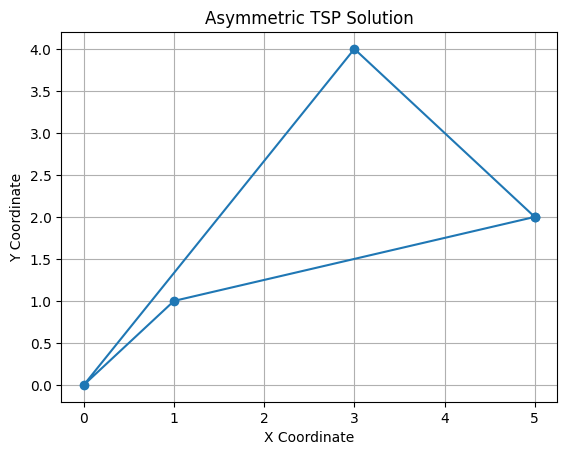

In [47]:
print("Visual representation of the path: ")
plot_tsp_path(coordinates, best_solution)